In [1]:
#Importing our dataset from csv file
import pandas as pd
dataset=pd.read_csv("/Users/alfahwun/Downloads/titanic.csv", sep=";")

In [2]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [12]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
#applying tree algorithm
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.776536312849162


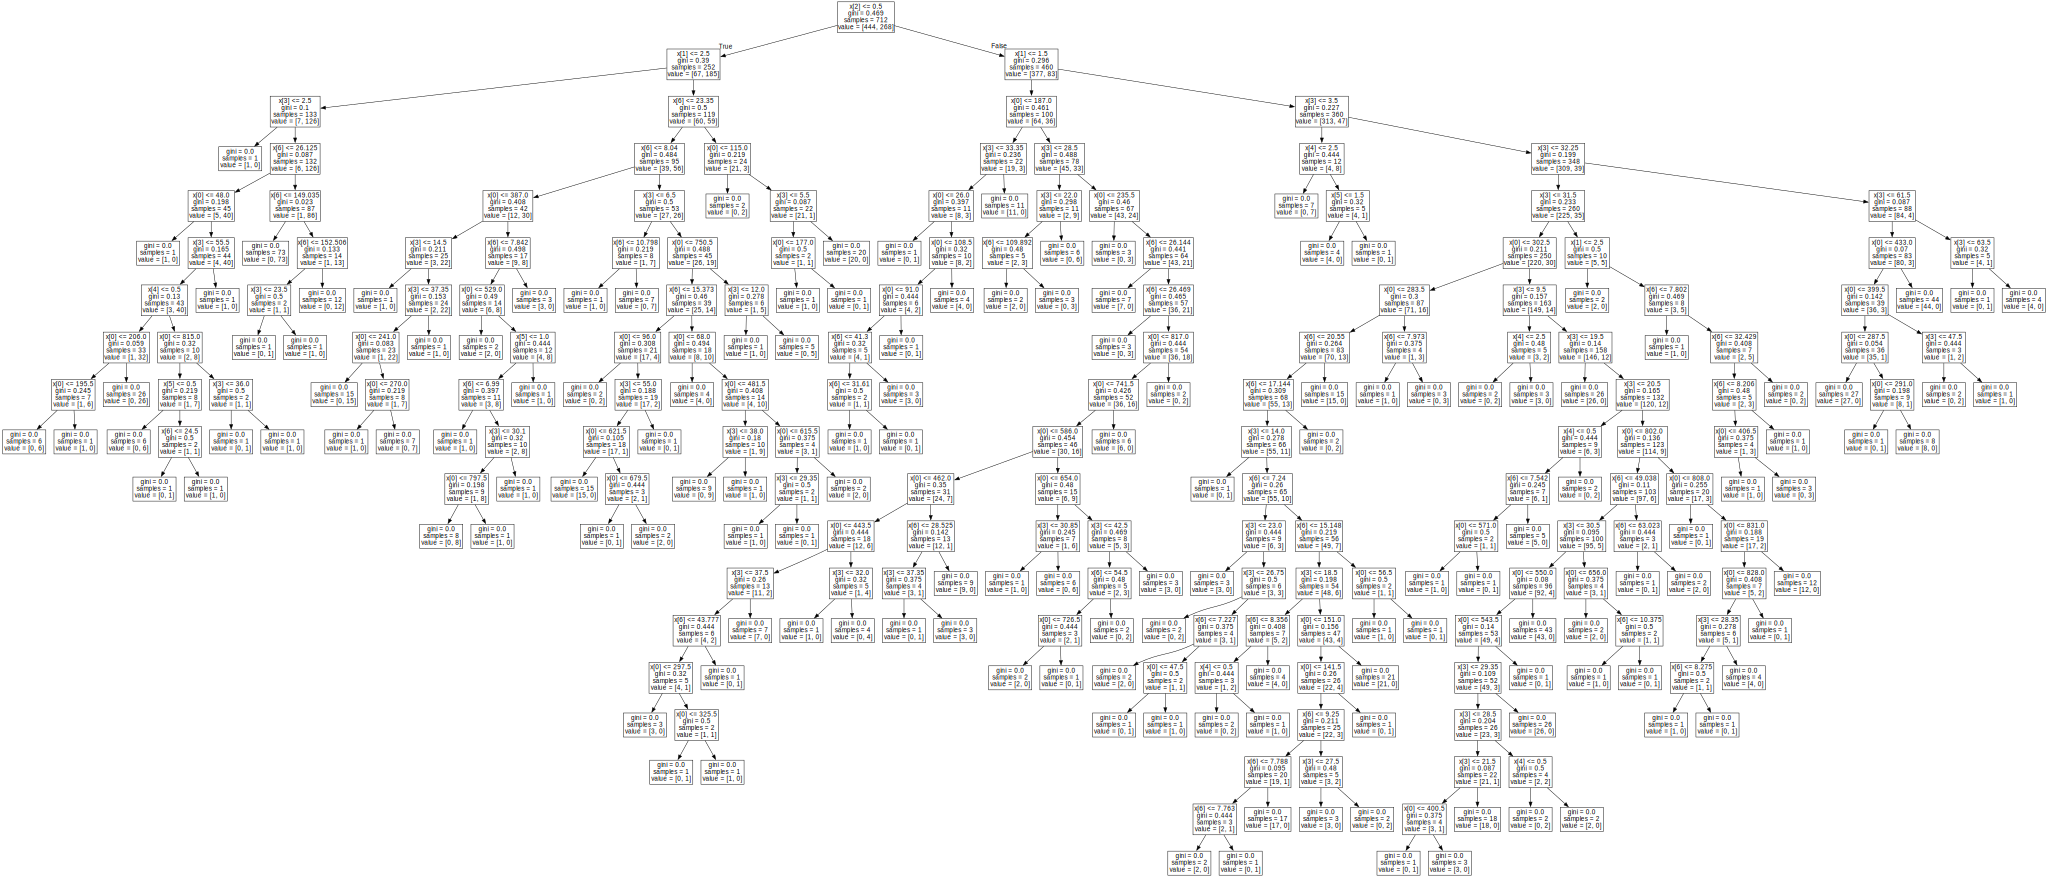

In [14]:
#importing graphiz to plot tree
import graphviz
dot_data =tree.export_graphviz(clf, out_file=None)
#ploting tree
graph = graphviz.Source(dot_data)
graph.render("data")
graph